# Task 1 : Unsupervised Learning

Dataset access link: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/data

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the dataset
dataset=pd.read_csv("Mall_Customers.csv") 

In [3]:
#Viewing the dataset
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#Going through the datatypes and other information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


###### Data Cleaning

In [5]:
# Dropping the CustomerID column as it is not considered important for our analysis
dataset.drop('CustomerID', axis=1, inplace=True)

In [6]:
#Checking for any missing values
pd.isnull(dataset).sum(axis=0)

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
#Dropping duplicate rows if there is any
dataset=dataset.drop_duplicates()

In [8]:
#Viewing the shape of dataset to check whether there was any duplicates
dataset.shape

(200, 4)

No duplicates were identified as the dataset maintained a constant size.

In [9]:
#Viewing descriptive statistics
dataset.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


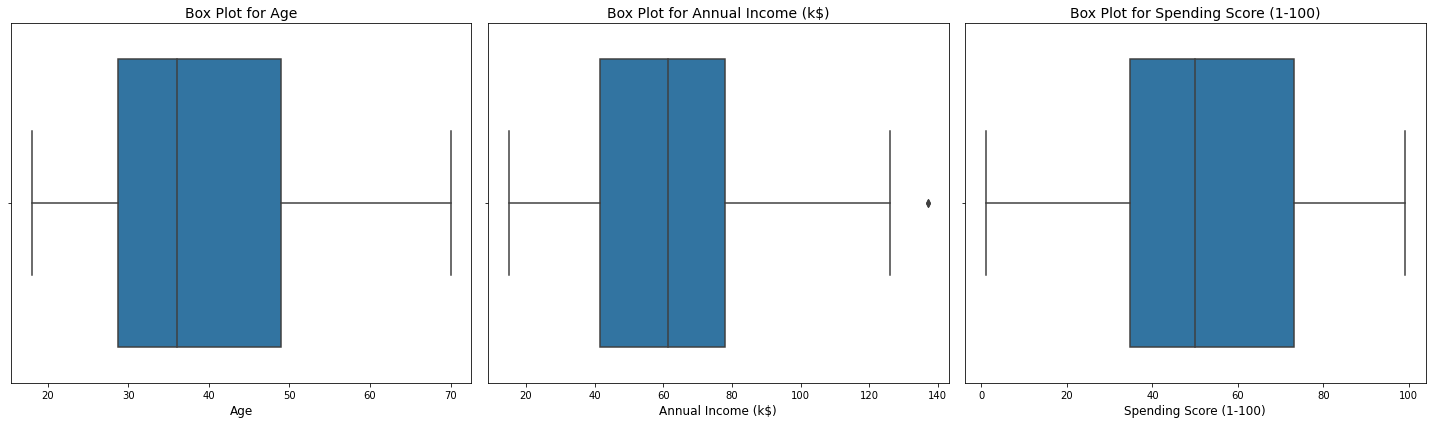

In [10]:
# Plotting box plots for numerical columns in the dataset
numerical_columns = dataset.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(20, 6))
for i, col in enumerate(numerical_columns, 1):  
    plt.subplot(1, 3, i)
    sns.boxplot(data=dataset, x=col)
    plt.title(f'Box Plot for {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)

plt.tight_layout()
plt.show()

The box plots indicate that outliers are present only in the 'Annual Income (k$)' column.

In [11]:
# Removing outliers
Q1 = dataset['Annual Income (k$)'].quantile(0.25)
Q3 = dataset['Annual Income (k$)'].quantile(0.75)
# Calculate the IQR
IQR = Q3 - Q1
dataset = dataset[(dataset['Annual Income (k$)'] >= Q1 - 1.5 * IQR) & (dataset['Annual Income (k$)'] <= Q3 + 1.5 * IQR)]

In [12]:
#Viewing the shape of the dataset to check how many outliers were there
dataset.shape

(198, 4)

###### Exploratory Data Analysis

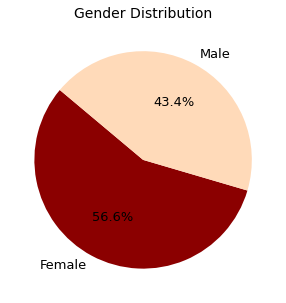

In [13]:
# Visualizing the gender distribution 
gender_counts = dataset['Gender'].value_counts()
plt.figure(figsize=(5, 5))
custom_colors = ['#8B0000', '#FFDAB9']  
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=custom_colors,  textprops={'fontsize': 13})
plt.title('Gender Distribution', size=14)
plt.show()

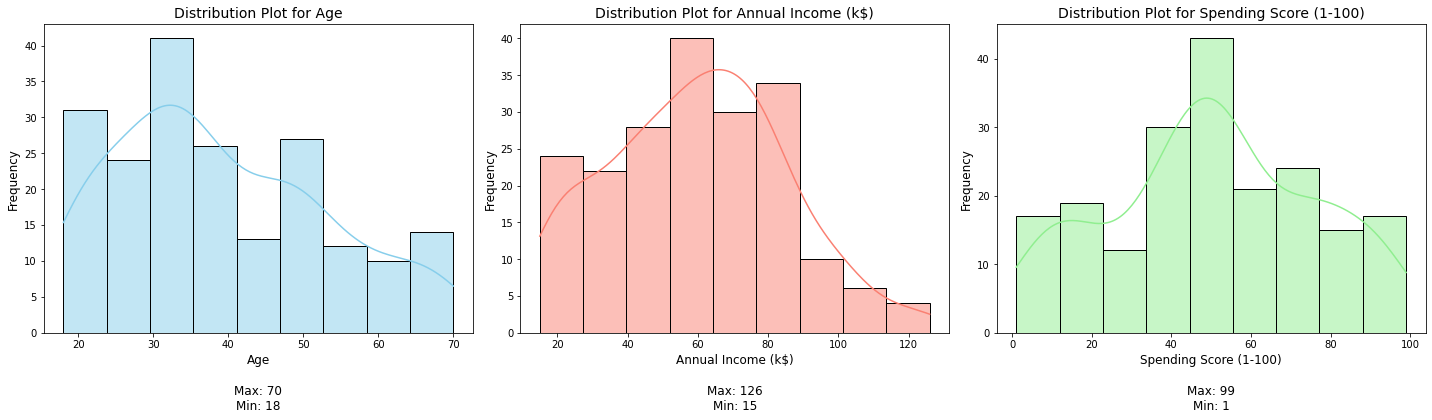

In [14]:
# Plotting distribution plots for numerical columns in the dataset
numerical_columns = dataset.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(20, 6))

colors = ['skyblue', 'salmon', 'lightgreen']

for i, (col, color) in enumerate(zip(numerical_columns, colors), 1):
    plt.subplot(1, 3, i)
    sns.histplot(data=dataset, x=col, kde=True, color=color)
    plt.title(f'Distribution Plot for {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.text(0.5, -0.25, f"Max: {dataset[col].max()}\nMin: {dataset[col].min()}", ha='center', fontsize=12, transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

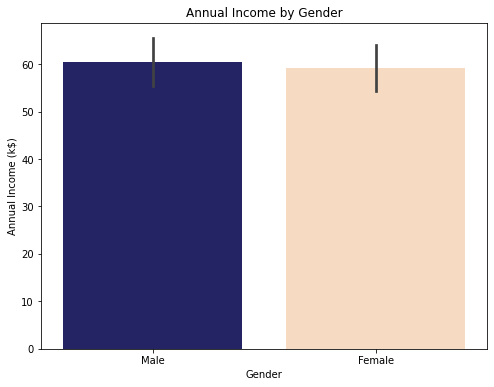

In [15]:
# Bar plot for Gender and Annual Income
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Annual Income (k$)', data=dataset, palette=['#191970', '#FFDAB9'])
plt.xlabel('Gender')
plt.ylabel('Annual Income (k$)')
plt.title('Annual Income by Gender')
plt.show()

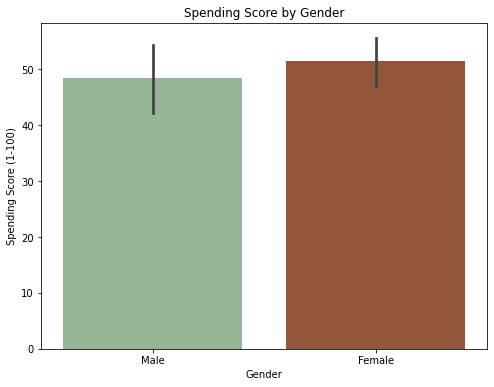

In [16]:
# Bar plot for Spending Score
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Spending Score (1-100)', data=dataset, palette=['#8FBC8F', '#A0522D'])
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score by Gender')
plt.show()

In [17]:
# Defining age groups
age_bins = [18, 35, 52, 70]
age_groups = ['18-35', '36-52', '53-70']
dataset['Age_group'] = pd.cut(dataset['Age'], bins=age_bins, labels=age_groups, right=False)

In [18]:
# Calculate average spending score for each age group and gender
average_spending_male = []
average_spending_female = []

for age_label in age_groups:
    avg_spending_male = dataset.loc[(dataset['Age_group'] == age_label) & (dataset['Gender'] == 'Male'), 'Spending Score (1-100)'].mean()
    avg_spending_female = dataset.loc[(dataset['Age_group'] == age_label) & (dataset['Gender'] == 'Female'), 'Spending Score (1-100)'].mean()
    average_spending_male.append(avg_spending_male)
    average_spending_female.append(avg_spending_female)

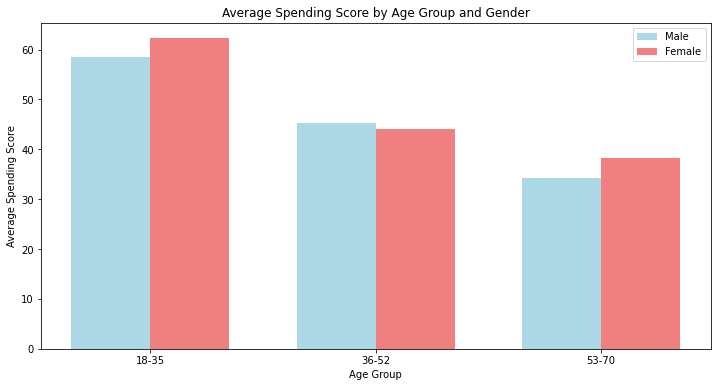

In [19]:
# Plot grouped bar plot for average spending score by age group and gender
bar_width = 0.35
index = np.arange(len(age_groups))
plt.figure(figsize=(12, 6))

# Plot bars for male average spending scores
plt.bar(index - bar_width/2, average_spending_male, bar_width, color='lightblue', label='Male')

# Plot bars for female average spending scores
plt.bar(index + bar_width/2, average_spending_female, bar_width, color='lightcoral', label='Female')

plt.title('Average Spending Score by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Average Spending Score')
plt.xticks(index, age_groups)
plt.legend()
plt.show()

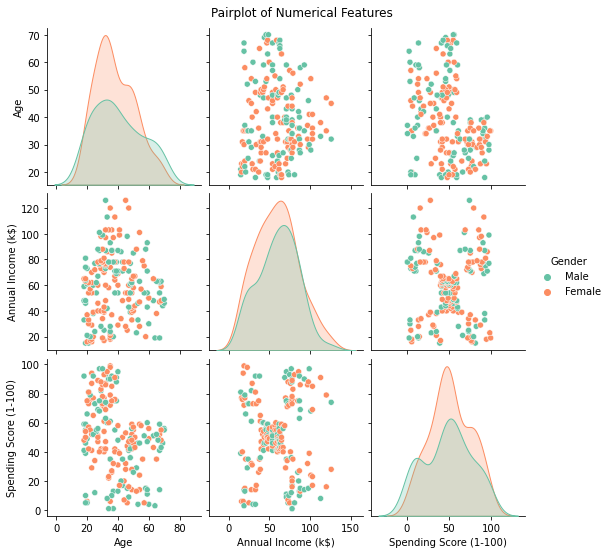

In [20]:
# Pairplot to visualize pairwise relationships between numerical features
sns.pairplot(dataset, hue='Gender', palette='Set2')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [22]:
# Encoding the 'Gender' column to numerical values( Female;0 , Male;1)
encoder = LabelEncoder()
dataset['Gender'] = encoder.fit_transform(dataset['Gender'])

<AxesSubplot:>

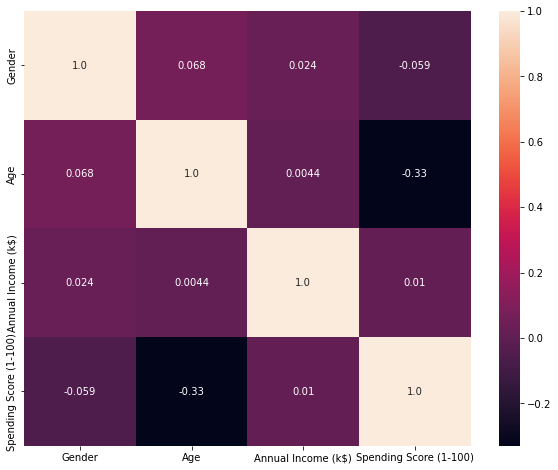

In [23]:
# Heatmap to visualize the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(),annot=True,fmt='.2')

In [24]:
# Selecting features for clustering
features=dataset[['Annual Income (k$)','Spending Score (1-100)']]

### kmeans Clustering

C:\Users\94772\anaconda3\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


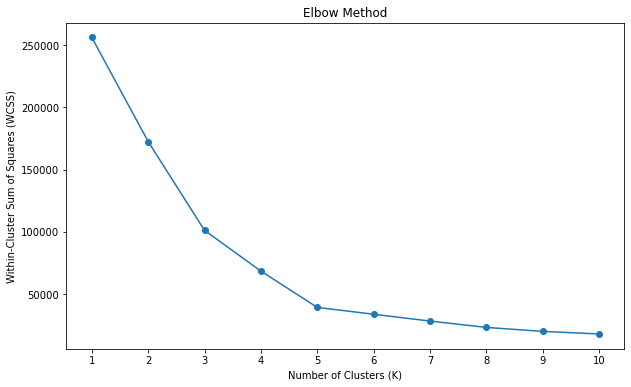

In [25]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state = 42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='#1f77b4')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))
plt.show()

From the graph, we see that the rate at which WCSS decreases slows down significantly at 5 clusters, suggesting that adding more clusters beyond this point may not result in substantial improvement in clustering quality.

In [26]:
# Performing KMeans clustering with the optimal number of clusters (k=5)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(features)
dataset['Cluster'] = kmeans.labels_

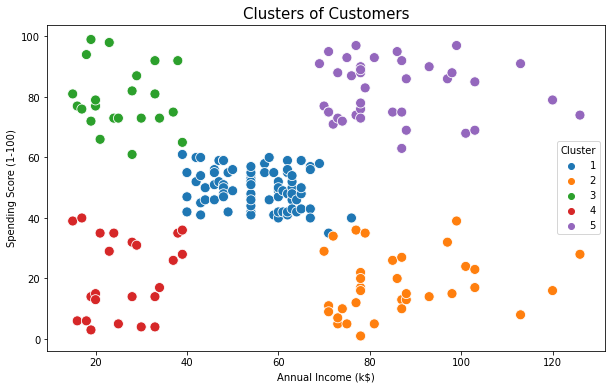

In [27]:
# Visualizing the clusters based on annual income and spending score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=dataset, hue=dataset['Cluster'] + 1, palette='tab10', legend='full', s=100)
plt.title('Clusters of Customers', fontsize=15)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

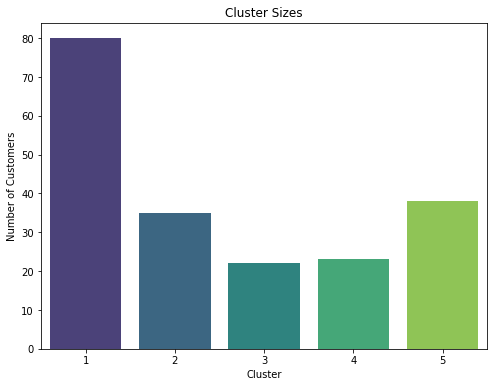

In [28]:
# Analyzing cluster sizes
cluster_sizes = dataset['Cluster'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_sizes.index + 1, y=cluster_sizes.values, palette='viridis')
plt.title('Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

In [29]:
# Calculate mean values of numerical features for each cluster
cluster_means = dataset.groupby('Cluster').mean().reset_index()

# Drop the 'Gender' column
cluster_means.drop(columns='Gender', inplace=True)

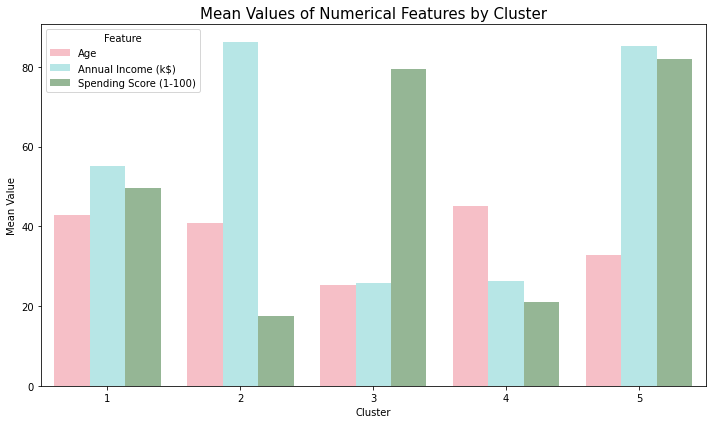

In [30]:
cluster_means_melted = cluster_means.melt(id_vars='Cluster', var_name='Feature', value_name='Mean Value')
cluster_means_melted['Cluster'] += 1

# Define the number of features
num_features = len(cluster_means_melted['Feature'].unique())

# Define custom palette with different colors for each bar within a cluster
custom_palette = ['#FFB6C1', '#AFEEEE', '#8FBC8F']

# Visualize the characteristics of each cluster
plt.figure(figsize=(10, 6))
sns.barplot(data=cluster_means_melted, x='Cluster', y='Mean Value', hue='Feature', palette=custom_palette)
plt.title('Mean Values of Numerical Features by Cluster', fontsize=15)
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.legend(title='Feature')
plt.tight_layout()
plt.show()


### Hierarchical Clustering

In [31]:
# Standardize the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(features)

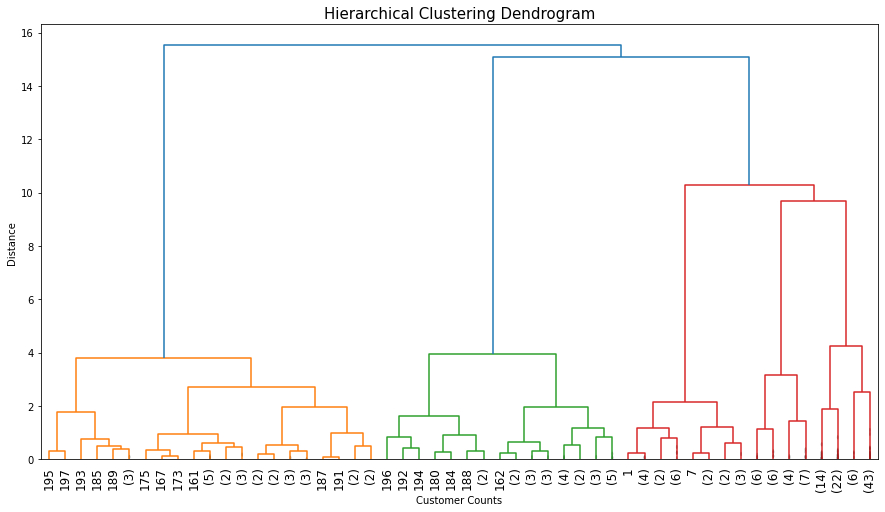

In [32]:
# Plotting the dendrogram to visualize the hierarchical clustering 
Z = linkage(x_scaled, method='ward')
plt.figure(figsize=(15, 8))
dendrogram(Z, p=5, truncate_mode='level', leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram', fontsize=15)
plt.xlabel('Customer Counts')
plt.ylabel('Distance')
plt.show()

In [33]:
# Calculate silhouette scores for different number of clusters
silhouette_scores = []
for k in range(2, 11):
    agg_clustering = AgglomerativeClustering(n_clusters=k)
    cluster_labels = agg_clustering.fit_predict(x_scaled)
    silhouette_avg = silhouette_score(x_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

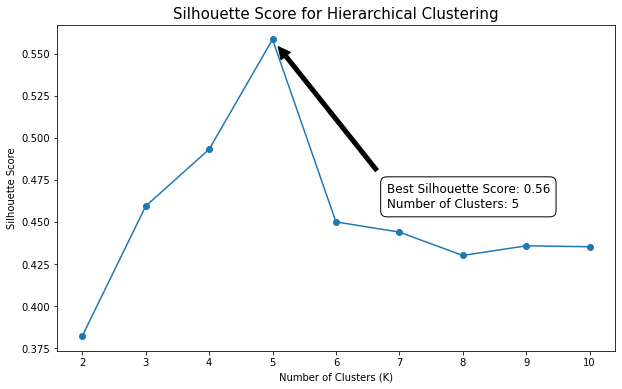

In [34]:
# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-', color='#1f77b4')
plt.title('Silhouette Score for Hierarchical Clustering', fontsize=15)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))

# Find the index of the maximum silhouette score
best_index = np.argmax(silhouette_scores)
best_score = silhouette_scores[best_index]
best_k = best_index + 2  # Add 2 to account for starting K value from 2



# Annotate the best score and the corresponding number of clusters
plt.annotate(f'Best Silhouette Score: {best_score:.2f}\nNumber of Clusters: {best_k}',
             xy=(best_k, best_score),
             xytext=(best_k + 1.8, best_score - 0.1),  # Adjusted xytext to the right
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12,
             bbox=dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='white'))

plt.show()

Both KMeans and Hierarchical Clustering suggest the same optimal number of clusters (5), indicating consistency in the clustering results across the two methods.

In [35]:
# Fit Agglomerative Clustering with optimal K value (5 clusters)
optimal_k = 5
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k)
cluster_labels = agg_clustering.fit_predict(x_scaled)
dataset['Cluster_Hierarchical'] = cluster_labels

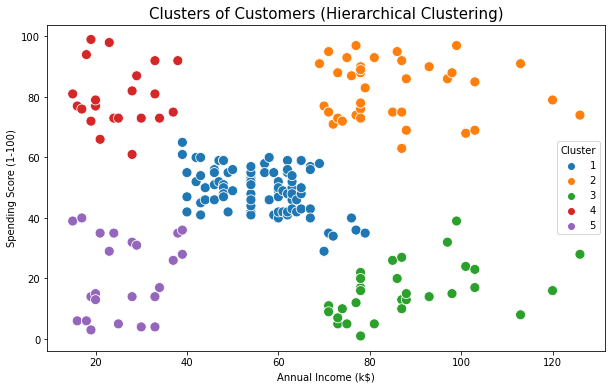

In [36]:
# Plotting the scatter plot to visualize the clusters of customers obtained based on annual income and spending score. 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='Annual Income (k$)', y='Spending Score (1-100)', hue=dataset['Cluster_Hierarchical'] + 1, palette='tab10', s=100)
plt.title('Clusters of Customers (Hierarchical Clustering)', fontsize=15)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

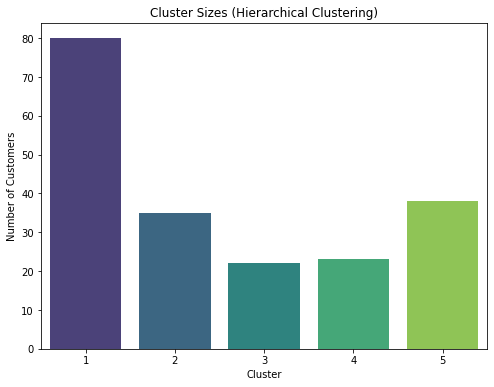

In [37]:
# Analyzing cluster sizes
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_sizes.index + 1, y=cluster_sizes.values, palette='viridis')
plt.title('Cluster Sizes (Hierarchical Clustering)')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

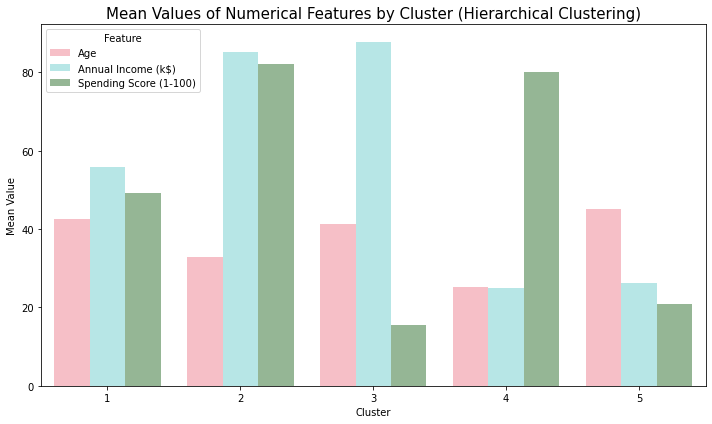

In [38]:
# Calculate mean values of numerical features for each cluster in Hierarchical Clustering
cluster_means_hierarchical = dataset.groupby('Cluster_Hierarchical').mean().reset_index()

# Drop the 'Gender' and 'Cluster' columns
cluster_means_hierarchical.drop(columns=['Gender', 'Cluster'], inplace=True)

cluster_means_melted_hierarchical = cluster_means_hierarchical.melt(id_vars='Cluster_Hierarchical', var_name='Feature', value_name='Mean Value')
cluster_means_melted_hierarchical['Cluster_Hierarchical'] += 1

custom_palette_hierarchical = ['#FFB6C1', '#AFEEEE', '#8FBC8F']

# Visualize the characteristics of each cluster in Hierarchical Clustering
plt.figure(figsize=(10, 6))
sns.barplot(data=cluster_means_melted_hierarchical, x='Cluster_Hierarchical', y='Mean Value', hue='Feature', palette=custom_palette_hierarchical)
plt.title('Mean Values of Numerical Features by Cluster (Hierarchical Clustering)', fontsize=15)
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.legend(title='Feature')
plt.tight_layout()
plt.show()

# Task 2 : Regression

Dataset access link: https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the dataset
df=pd.read_csv("boston.csv") 

In [3]:
#Viewing the dataset
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [4]:
#Viewing the number of rows and columns of dataset
df.shape

(506, 14)

In [5]:
#Viewing the dataset's data types and other related information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


###### Data Cleaning

In [6]:
#Dropping duplicate rows if there is any
df=df.drop_duplicates()

In [7]:
#Viewing the shape of dataset again to check whether there was any duplicates
df.shape

(506, 14)

In [8]:
#Checking for any missing values in 'data'
pd.isnull(df).sum(axis=0)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
#Examining the statistical summary of the dataset's columns
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


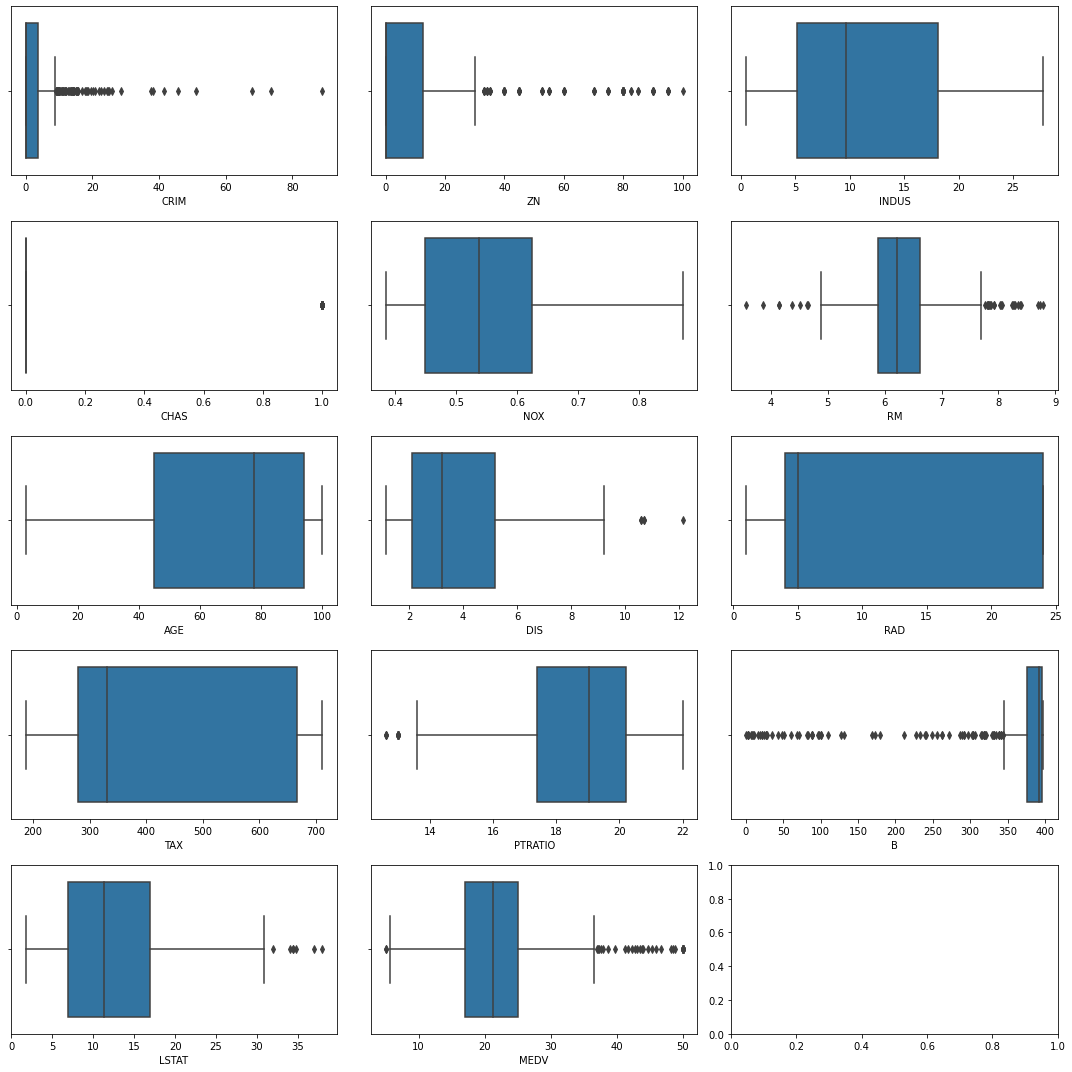

In [10]:
# Boxplot - checking for outliers
num_rows = (len(df.columns) + 2) // 3  
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15,15))

# Create a boxplot for each column in the DataFrame
for i, col in enumerate(df.columns):
    sns.boxplot(data=df, x=col, ax=axes[i // 3, i % 3])
plt.tight_layout()
plt.show()

We're excluding the 'ZN' column because the values are clustered around zero for the middle 50% of the data, indicating little variation and likely not helpful for predicting 'MEDV'. Similarly, we're also excluding the 'CHAS' column because it contains only zeros across the entire range, showing little diversity and probably not useful for our model.

In [11]:
#dropping CHAS and ZN columns
df=df.drop(['CHAS','ZN'],axis=1)

In [12]:
# Define the quantiles and IQR for all columns except 'MEDV'
q1 = df.drop(columns=['MEDV']).quantile(0.25)
q3 = df.drop(columns=['MEDV']).quantile(0.75)
iqr = q3 - q1
ul = q3 + (1.5 * iqr)
ll = q1 - (1.5 * iqr)

# Remove outliers for each column
for column in df.columns:
    if column != 'MEDV':
        df = df[(df[column] < ul[column]) & (df[column] > ll[column])]

In [13]:
#Viewing the shape of the dataset to check the number of outliers removed
df.shape

(353, 12)

###### Exploratory Data Analysis

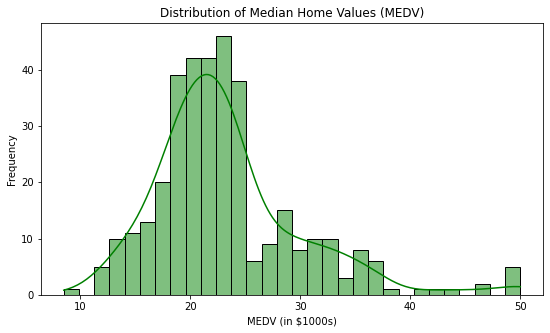

In [14]:
#Distribution of Median Home Values (MEDV)
plt.figure(figsize=(9, 5))
sns.histplot(df['MEDV'], bins=30, kde=True, color='green')
plt.title('Distribution of Median Home Values (MEDV)')
plt.xlabel('MEDV (in $1000s)')
plt.ylabel('Frequency')
plt.show()

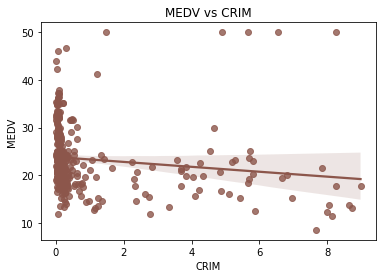

In [15]:
#Impact of CRIM on MEDV
plt.figure(figsize=(6, 4))
sns.regplot(x='CRIM', y='MEDV', data=df, color = "#8c564b")
plt.title('MEDV vs CRIM')
plt.xlabel('CRIM')
plt.ylabel('MEDV')
plt.show()

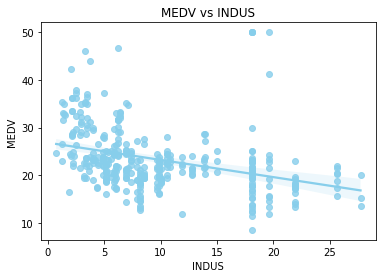

In [16]:
#Impact of INDUS on MEDV
plt.figure(figsize=(6, 4))
sns.regplot(x='INDUS', y='MEDV', data=df, color = "#87CEEB")
plt.title('MEDV vs INDUS')
plt.xlabel('INDUS')
plt.ylabel('MEDV')
plt.show()

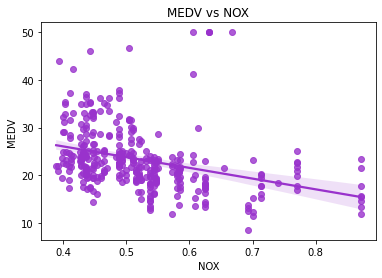

In [17]:
#Impact of NOX on MEDV
plt.figure(figsize=(6, 4))
sns.regplot(x='NOX', y='MEDV', data=df, color = "#9932CC")
plt.title('MEDV vs NOX')
plt.xlabel('NOX')
plt.ylabel('MEDV')
plt.show()

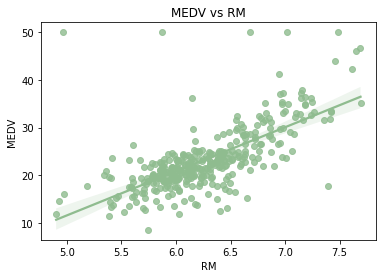

In [18]:
#Impact of RM on MEDV
plt.figure(figsize=(6, 4))
sns.regplot(x='RM', y='MEDV', data=df, color = "#8FBC8F")
plt.title('MEDV vs RM')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()

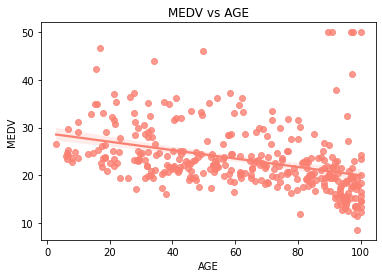

In [19]:
#Impact of AGE on MEDV
plt.figure(figsize=(6, 4))
sns.regplot(x='AGE', y='MEDV', data=df, color = "#FA8072")
plt.title('MEDV vs AGE')
plt.xlabel('AGE')
plt.ylabel('MEDV')
plt.show()

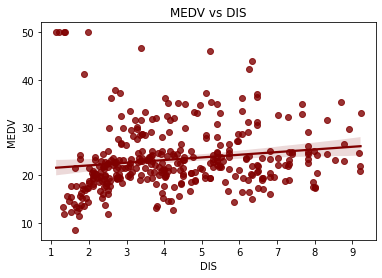

In [20]:
#Impact of DIS on MEDV
plt.figure(figsize=(6, 4))
sns.regplot(x='DIS', y='MEDV', data=df, color = "#800000")
plt.title('MEDV vs DIS')
plt.xlabel('DIS')
plt.ylabel('MEDV')
plt.show()

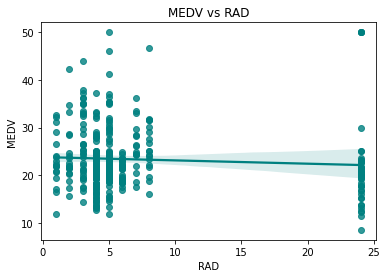

In [21]:
#Impact of RAD on MEDV
plt.figure(figsize=(6, 4))
sns.regplot(x='RAD', y='MEDV', data=df, color = "#008080")
plt.title('MEDV vs RAD')
plt.xlabel('RAD')
plt.ylabel('MEDV')
plt.show()

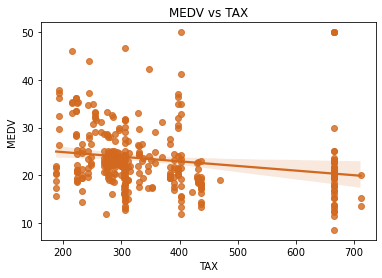

In [22]:
#Impact of TAX on MEDV
plt.figure(figsize=(6, 4))
sns.regplot(x='TAX', y='MEDV', data=df, color = "#D2691E")
plt.title('MEDV vs TAX')
plt.xlabel('TAX')
plt.ylabel('MEDV')
plt.show()

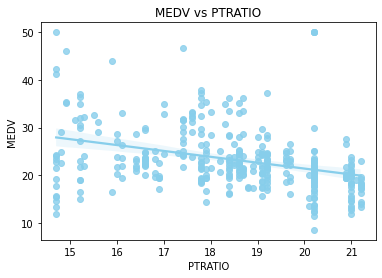

In [23]:
#Impact of PTRATIO on MEDV
plt.figure(figsize=(6, 4))
sns.regplot(x='PTRATIO', y='MEDV', data=df, color = "#87CEEB")
plt.title('MEDV vs PTRATIO')
plt.xlabel('PTRATIO')
plt.ylabel('MEDV')
plt.show()

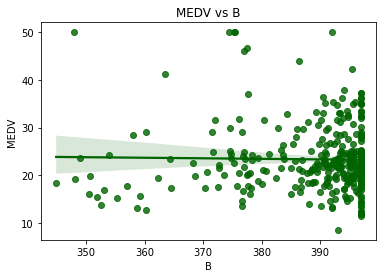

In [24]:
#Impact of B on MEDV
plt.figure(figsize=(6, 4))
sns.regplot(x='B', y='MEDV', data=df, color = "#006400")
plt.title('MEDV vs B')
plt.xlabel('B')
plt.ylabel('MEDV')
plt.show()

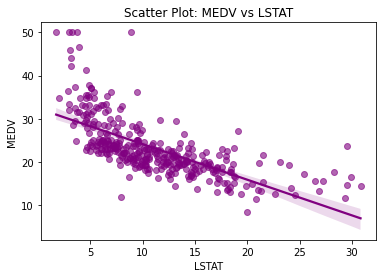

In [25]:
# Scatter plot of 'MEDV' vs 'LSTAT'
plt.figure(figsize=(6, 4))
sns.regplot(x='LSTAT', y='MEDV', data=df, color='purple', scatter_kws={'alpha':0.6})
plt.title('Scatter Plot: MEDV vs LSTAT')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

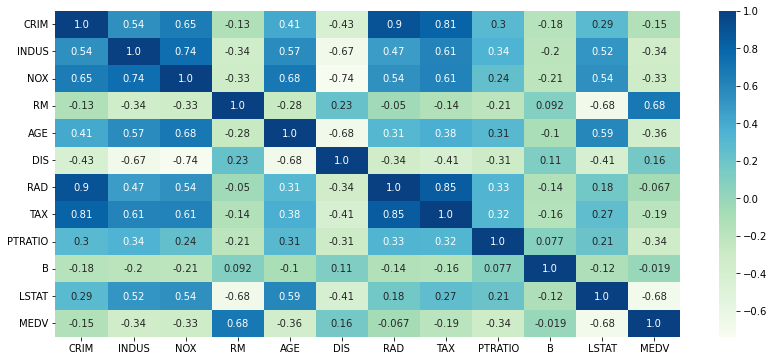

In [26]:
# Heatmap to check correlations of features
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(), annot=True, fmt='.2', cmap='GnBu')
plt.show()


Considering a variable to be highly correlated if the magnitude of correlation is 0.9 or higher.

CRIM and RAD seem to be highly correlated

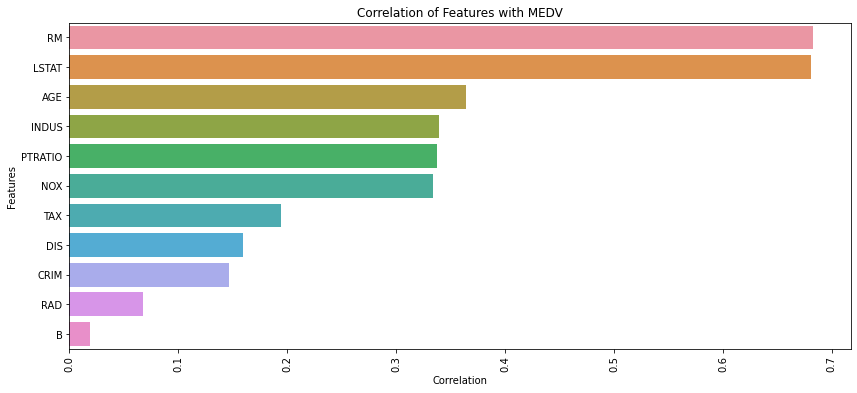

In [27]:
#Plot to check correlations of features vs MDEV
corr=abs(df.corr())
plt.figure(figsize=(14, 6))
sns.barplot(x=corr["MEDV"].sort_values(ascending=False)[1:].values, y=corr["MEDV"].sort_values(ascending=False)[1:].index)
plt.ylabel("Features")
plt.xlabel("Correlation")
plt.title("Correlation of Features with MEDV")
plt.xticks(rotation=90)
plt.show()

To avoid multicollinearity the least important features RAD and B were eliminated

In [28]:
#dropping RAD and B columns
df=df.drop(['RAD','B'],axis=1)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate

In [30]:
#Separating features (X) and target variable (y) from the DataFrame
X = df.drop(columns='MEDV', axis = 1)
y = df['MEDV']

In [31]:
#Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [32]:
#Standardizing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
#Finding the best models
regressors = [
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    XGBRegressor()
]

In [34]:
model_metrics = []

for model in regressors: 
    # Fit the model to the training data
    model.fit(X_train_scaled, y_train)
    
    # Make predictions on the testing set
    y_pred = model.predict(X_test_scaled)
    
    # Compute evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = model.score(X_test_scaled, y_test)
    
    model_metrics.append({'Model': model.__class__.__name__, 
                          'R Squared': r2,
                          'Mean Squared Error': mse,
                          'Mean Absolute Error': mae,
                          'Root Mean Squared Error': rmse})

# Create a DataFrame from the list of model metrics
model_evaluation = pd.DataFrame(model_metrics)
model_evaluation = model_evaluation.sort_values(by='R Squared', ascending=False)
table = tabulate(model_evaluation, headers='keys', tablefmt='fancy_grid', showindex=False)

# Print the table
print(table)

╒═══════════════════════════╤═════════════╤══════════════════════╤═══════════════════════╤═══════════════════════════╕
│ Model                     │   R Squared │   Mean Squared Error │   Mean Absolute Error │   Root Mean Squared Error │
╞═══════════════════════════╪═════════════╪══════════════════════╪═══════════════════════╪═══════════════════════════╡
│ GradientBoostingRegressor │    0.898002 │              5.03714 │               1.67041 │                   2.24436 │
├───────────────────────────┼─────────────┼──────────────────────┼───────────────────────┼───────────────────────────┤
│ RandomForestRegressor     │    0.873182 │              6.26289 │               1.86787 │                   2.50258 │
├───────────────────────────┼─────────────┼──────────────────────┼───────────────────────┼───────────────────────────┤
│ XGBRegressor              │    0.872336 │              6.30464 │               1.8057  │                   2.5109  │
├───────────────────────────┼─────────────┼─────

From the results above, it can be seen that GradientBoostingRegressor, RandomForestRegressor, XGBRegressor and LinearRegression are the best fit models for this data, so these will be explored further.

### Gradient Boosting Regressor

##### Hyperparameter Tuning

In [35]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],  
    'learning_rate': [0.01, 0.1, 0.2], 
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4],  
    'min_samples_leaf': [1, 2, 3],  
}

In [36]:
# Initialize Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor()

In [37]:
# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(gb_regressor, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 100, 150]},
             scoring='r2')

In [38]:
# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [39]:
# Get the best model
best_gb_regressor = grid_search.best_estimator_

In [40]:
# Make predictions on the testing set
y_pred = best_gb_regressor.predict(X_test_scaled)

# Evaluate the model
r2   = r2_score(y_test, y_pred)            
mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)                      

#Defining a DataFrame 
results = pd.DataFrame([['Gradient Boosting Regressor', r2, mae, mse, rmse]],
                      columns=['Model', 'R-squared (R²)', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error'])

results

,Model,R-squared (R²),Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,Gradient Boosting Regressor,0.902532,1.704219,4.813426,2.193952


The tuned model configuration will be used as hyperparameter tuning has resulted in an improvement in the R-squared score.

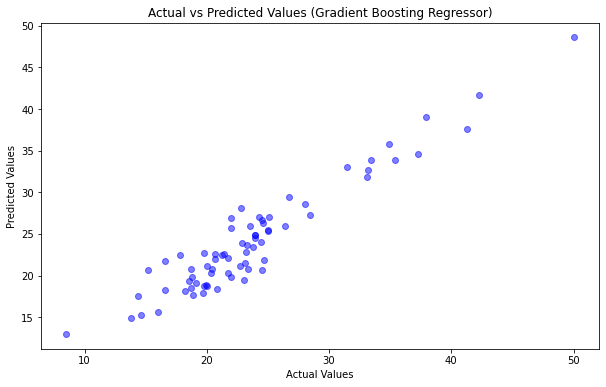

In [41]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)    
plt.title('Actual vs Predicted Values (Gradient Boosting Regressor)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

### Random Forest Regressor

##### Hyperparameter tuning

In [42]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]  
}

In [43]:
# Initialize Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [44]:
# Get the best model
best_rf_regressor = grid_search.best_estimator_

# Make predictions on the testing set
y_pred = best_rf_regressor.predict(X_test_scaled)

# Evaluate the model
r2   = r2_score(y_test, y_pred)            
mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)                      

#Defining a DataFrame 
results = pd.DataFrame([['Random Forest Regressor', r2, mae, mse, rmse]],
                      columns=['Model', 'R-squared (R²)', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error'])

results

,Model,R-squared (R²),Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,Random Forest Regressor,0.860123,1.964512,6.907795,2.628268


The default model configuration will be used as hyperparameter tuning did not lead to an improvement in the R-squared score.

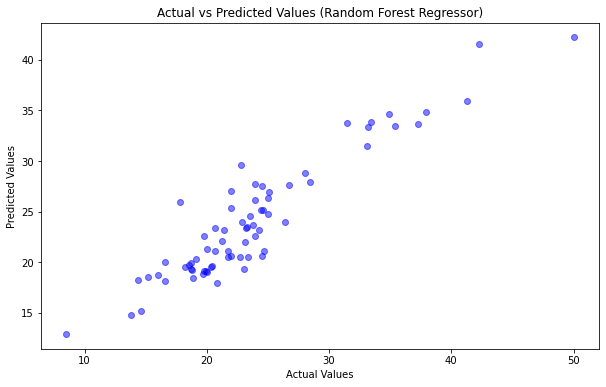

In [45]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5) 
plt.title('Actual vs Predicted Values (Random Forest Regressor)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

### XGBoost Regressor

##### Hyperparameter tuning

In [46]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300], 
    'learning_rate': [0.01, 0.1, 0.2], 
    'max_depth': [3, 4, 5], 
    'min_child_weight': [1, 3, 5], 
    'gamma': [0, 0.1, 0.2],  
    'subsample': [0.6, 0.8, 1.0],  
    'colsample_bytree': [0.6, 0.8, 1.0], 
    'reg_alpha': [0, 0.1, 0.5],  
    'reg_lambda': [0, 0.1, 0.5]  
}

In [47]:
# Initialize XGBRegressor
xgb_regressor = XGBRegressor(random_state=42)

# Perform Randomized Search Cross-Validation
random_search = RandomizedSearchCV(xgb_regressor, param_distributions=param_grid, n_iter=10, cv=5, scoring='r2', random_state=42)
random_search.fit(X_train_scaled, y_train)

# Print the best parameters found
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'subsample': 1.0, 'reg_lambda': 0.1, 'reg_alpha': 0.5, 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.6}


In [48]:
# Get the best model
best_xgb_regressor = grid_search.best_estimator_

# Make predictions on the testing set
y_pred = best_xgb_regressor.predict(X_test_scaled)

# Evaluate the model
r2   = r2_score(y_test, y_pred)            
mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)                      

#Defining a DataFrame 
results = pd.DataFrame([['XGBRegressor', r2, mae, mse, rmse]],
                      columns=['Model', 'R-squared (R²)', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error'])

results

,Model,R-squared (R²),Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,XGBRegressor,0.860123,1.964512,6.907795,2.628268


The default model configuration will be used as hyperparameter tuning did not lead to an improvement in the R-squared score.

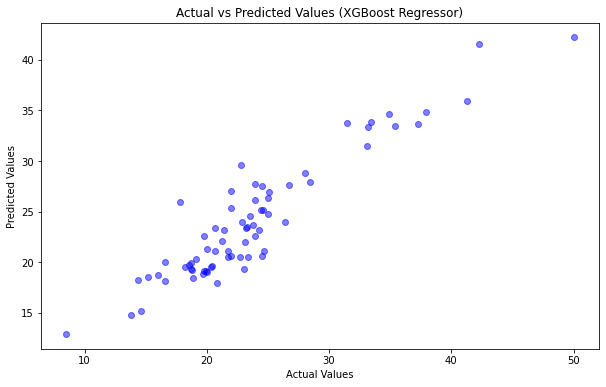

In [49]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)  
plt.title('Actual vs Predicted Values (XGBoost Regressor)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

### Linear Regression

In [50]:
# Fit the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

In [51]:
# Evaluate the model
r2   = r2_score(y_test, y_pred)            
mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)                      

#Defining a DataFrame 
results = pd.DataFrame([['Linear Regression', r2, mae, mse, rmse]],
                      columns=['Model', 'R-squared (R²)', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error'])

results

,Model,R-squared (R²),Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,Linear Regression,0.695502,2.91077,15.03752,3.877824


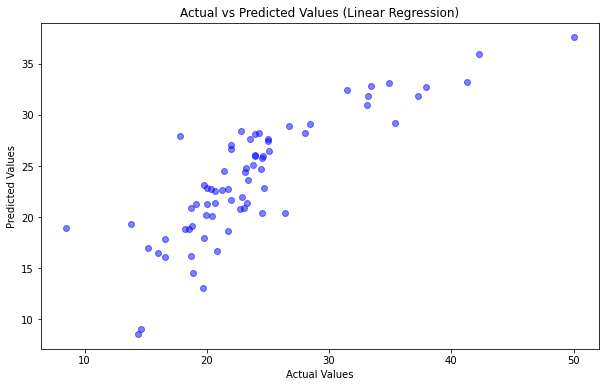

In [52]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)  
plt.title('Actual vs Predicted Values (Linear Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

#### The assumptions of Linear Regression

##### Linearity

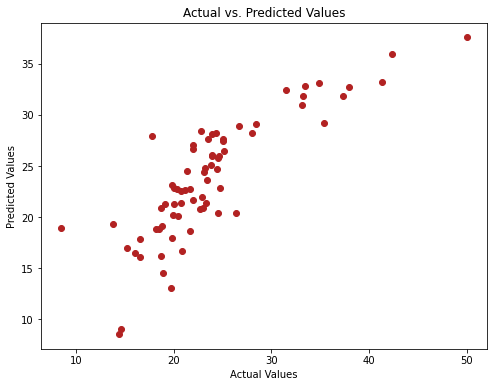

In [53]:
# Linearity: Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='#B22222')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

##### Homoscedasticity

In [54]:
# Residual Analysis
residuals = y_test - y_pred

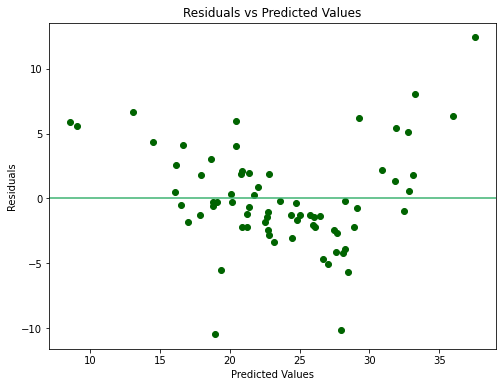

In [55]:
# Check for homoscedasticity (Constant variance of residuals)
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='#006400')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.axhline(y=0, color='#3CB371', linestyle='-')
plt.show()

##### Normality

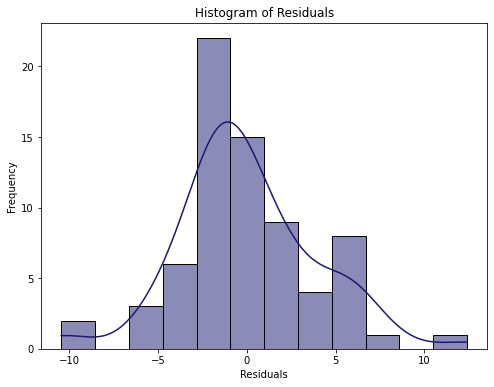

In [56]:
# Check for normality of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='#191970')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

# Task 3 : Classification

Dataset access link: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the dataset
data = pd.read_csv("heart.csv")

In [3]:
#Viewing the dataset
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
#Viewing the number of rows and columns of dataset
data.shape

(918, 12)

In [5]:
#Going through the datatypes and other information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


##### Data Cleaning

In [6]:
#Dropping duplicate rows if there is any
data=data.drop_duplicates()

In [7]:
#Viewing the shape of dataset again to check whether there was any duplicates
data.shape

(918, 12)

No duplicates were found as the dataset’s size remained constant.

In [8]:
#Checking for any missing values in 'data'
pd.isnull(data).sum(axis=0)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

There are no missing values in the dataset

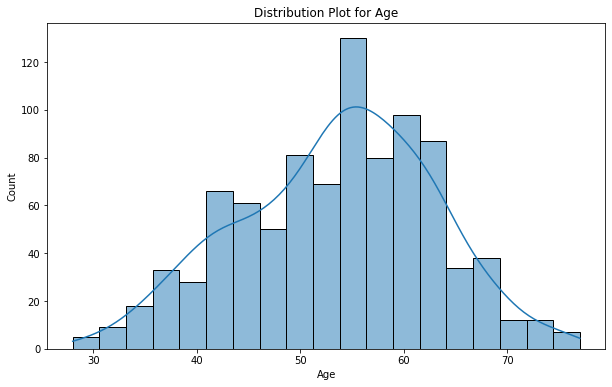

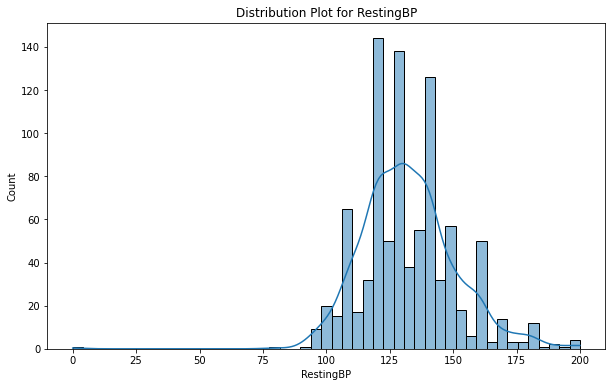

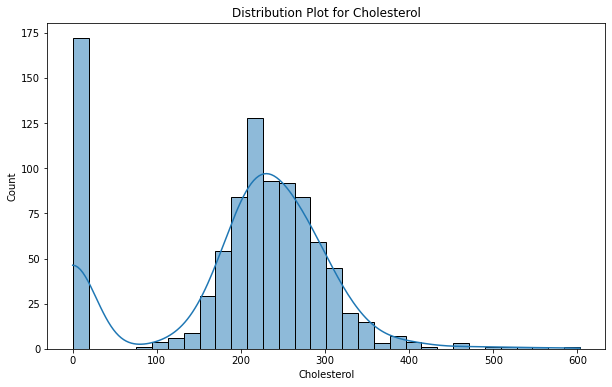

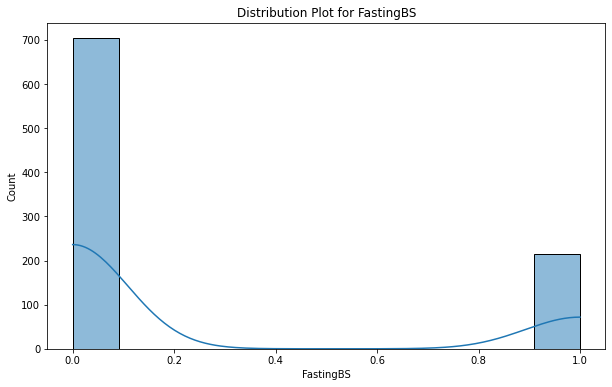

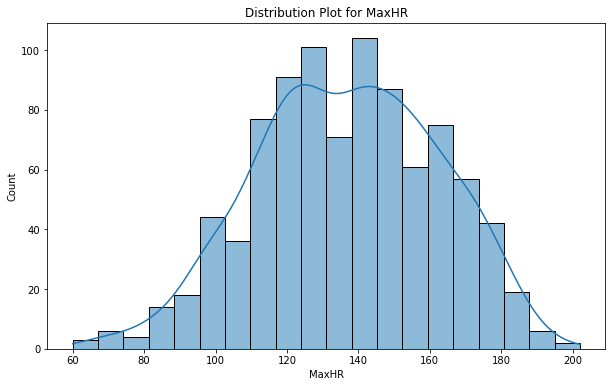

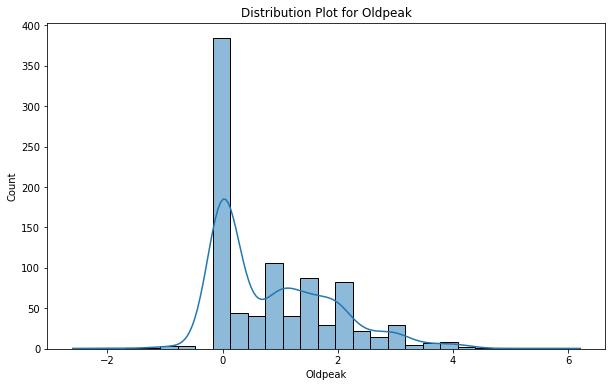

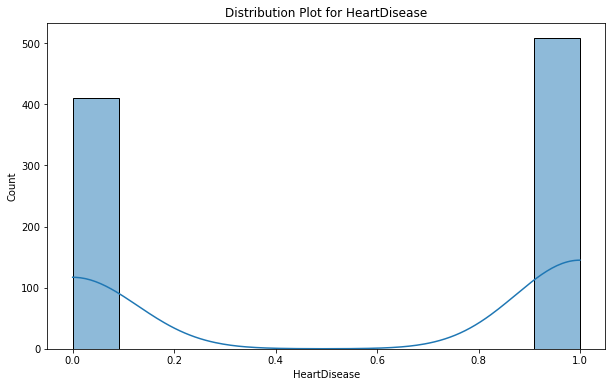

In [9]:
#visualizing the distribution of numerical data in the dataset
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=col, kde=True)
    plt.title(f'Distribution Plot for {col}')
    plt.show()

Not possible for a living person to have a cholesterol level of zero. Cholesterol is a type of fat that is essential for the body’s functioning. It is used in the formation of cell membranes and some hormones, and plays other vital roles in the body

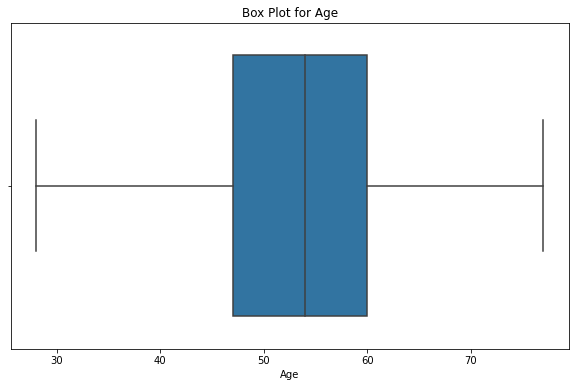

Maximum value in Age: 77
Minimum value in Age: 28


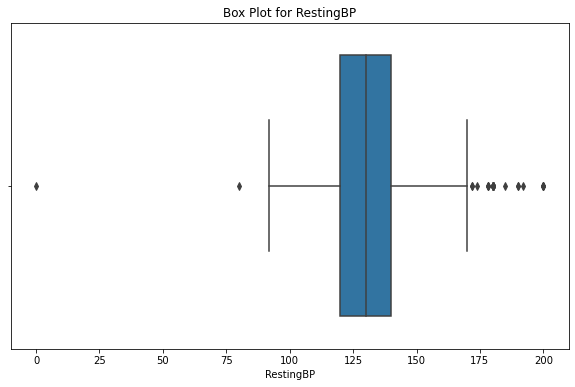

Maximum value in RestingBP: 200
Minimum value in RestingBP: 0


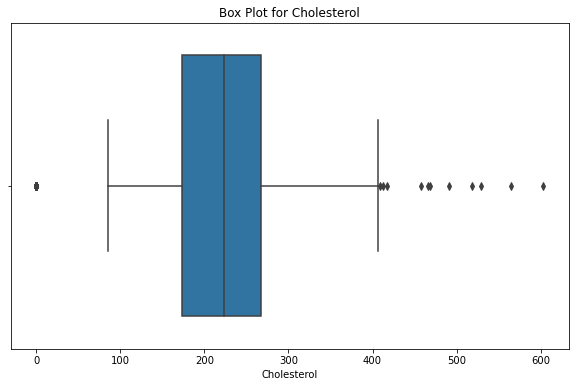

Maximum value in Cholesterol: 603
Minimum value in Cholesterol: 0


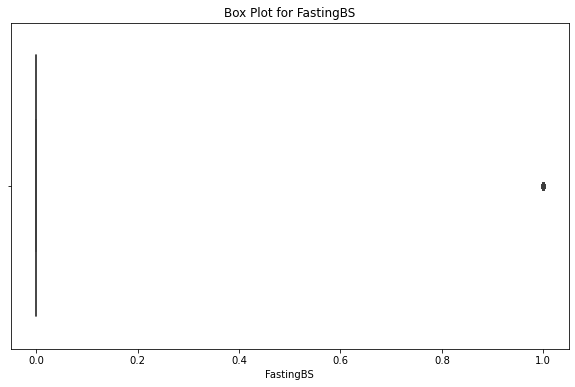

Maximum value in FastingBS: 1
Minimum value in FastingBS: 0


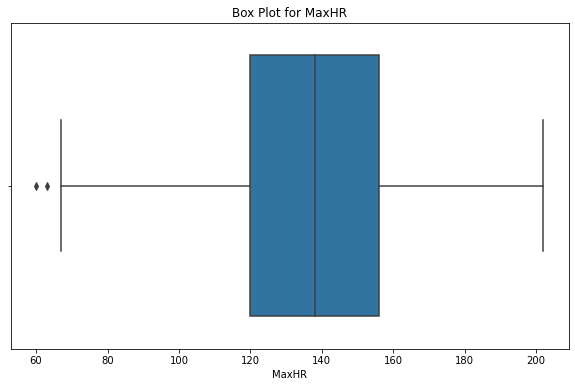

Maximum value in MaxHR: 202
Minimum value in MaxHR: 60


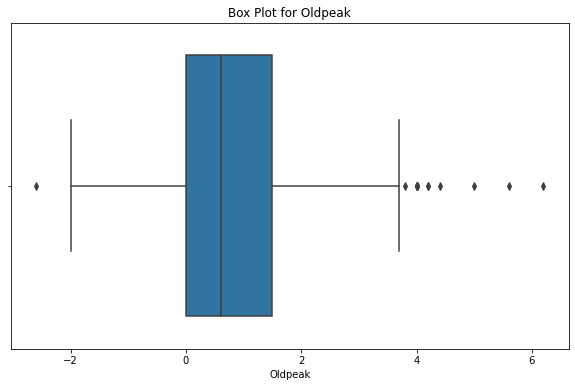

Maximum value in Oldpeak: 6.2
Minimum value in Oldpeak: -2.6


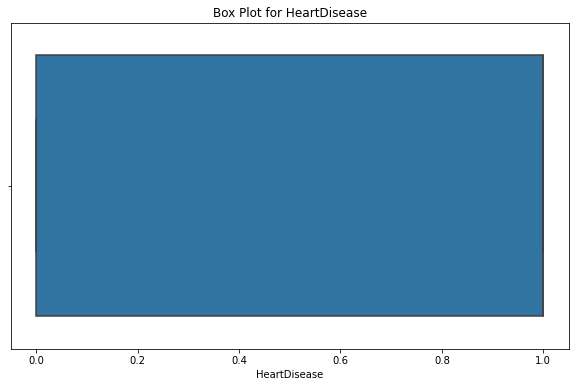

Maximum value in HeartDisease: 1
Minimum value in HeartDisease: 0


In [10]:
#box plots for numerical columns in the dataset
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x=col)
    plt.title(f'Box Plot for {col}')
    plt.show()
    
    # Print max and min values
    print(f'Maximum value in {col}: {data[col].max()}')
    print(f'Minimum value in {col}: {data[col].min()}')

In [11]:
#The outliers in numerical columns of the dataset
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

    print(f'Outliers count {outliers.shape}:')

    print(f'Outliers in {col}:')
    print(outliers)

Outliers count (0, 12):
Outliers in Age:
Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []
Outliers count (28, 12):
Outliers in RestingBP:
     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
109   39   M           ATA        190          241          0     Normal   
123   58   F           ATA        180          393          0     Normal   
189   53   M           ASY        180          285          0         ST   
190   46   M           ASY        180          280          0         ST   
241   54   M           ASY        200          198          0     Normal   
274   45   F           ATA        180          295          0     Normal   
275   59   M           NAP        180          213          0     Normal   
278   57   F           ASY        180          347          0         ST   
314   53   M           ASY         80            0          0  

Understanding the Data: It’s important to understand the nature of the data, the context in which it was collected, and what constitutes a “normal” range of values.

not all outliers are bad or erroneous. Some outliers represent true but rare observations, so it’s important not to automatically exclude them from your analysis

Removing Outliers
- RestingBP > 0
- Cholesterol >0

In [12]:
#Remove rows with zero values in the 'RestingBP' and 'Cholesterol' columns
data = data[data['RestingBP'] != 0]
data = data[data['Cholesterol'] != 0]

In [13]:
#Viewing the shape of dataset again to check the number of rows removed
data.shape

(746, 12)

In [14]:
#Checking how balance the dataset is in terms of the target variable value counts
data.HeartDisease.value_counts()

0    390
1    356
Name: HeartDisease, dtype: int64

##### Exploratory Data Analysis

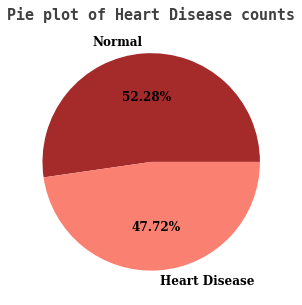

In [15]:
#Checking the imbalance of the dataset through a pie plot
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.pie(data['HeartDisease'].value_counts(),
       labels=["Normal", "Heart Disease"],
       autopct='%1.2f%%',
       colors=['Brown', 'salmon'],  
       textprops={'fontsize': 12, 'fontfamily': 'serif', 'fontweight': 'bold'})  

ax.set_title("Pie plot of Heart Disease counts",
             color='#404040',
             family='monospace',
             size=15,
             weight='bold')

plt.show()

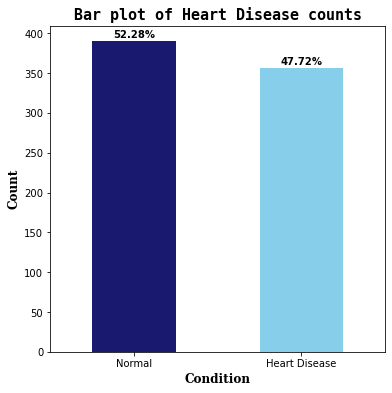

In [16]:
# Create a bar plot for the imbalance of the dataset
plt.figure(figsize=(6, 6))
counts = data['HeartDisease'].value_counts()
bar_plot = counts.plot(kind='bar', color=['#191970', '#87CEEB'])

# Add percentages on top of each bar
for i, count in enumerate(counts):
    plt.text(i, count + 5, f'{count / len(data) * 100:.2f}%', ha='center', fontsize=10, fontweight='bold')

# Add labels and title
plt.xlabel('Condition', fontsize=12, fontfamily='serif', fontweight='bold')
plt.ylabel('Count', fontsize=12, fontfamily='serif', fontweight='bold')
plt.title('Bar plot of Heart Disease counts', fontsize=15, fontfamily='monospace', fontweight='bold')

# Customize ticks
plt.xticks(ticks=[0, 1], labels=["Normal", "Heart Disease"], rotation=0)

plt.show()

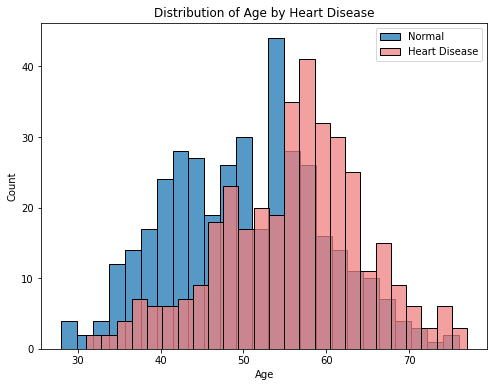

In [17]:
#Plotting a histogram to view impact of age on people having heart disease
plt.figure(figsize=(8, 6))
sns.histplot(data=data[data['HeartDisease'] == 0], x='Age', kde=False, color='#1f77b4', label='Normal', bins=25)
sns.histplot(data=data[data['HeartDisease'] == 1], x='Age', kde=False, color='lightcoral', label='Heart Disease', bins=25)
plt.title('Distribution of Age by Heart Disease')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

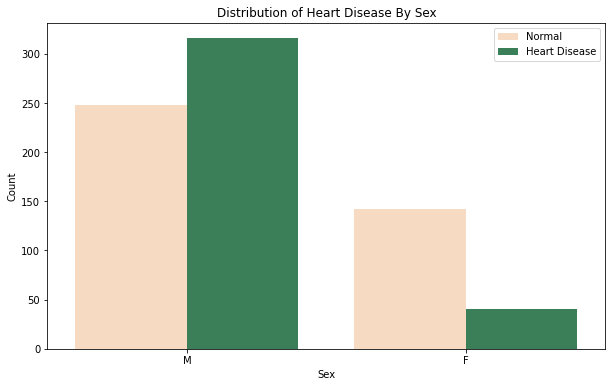

In [18]:
# Plotting count of HeartDisease by Sex
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Sex', hue='HeartDisease', palette=['#FFDAB9', '#2E8B57'], hue_order=[0, 1])
plt.title('Distribution of Heart Disease By Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(['Normal', 'Heart Disease'])
plt.show()

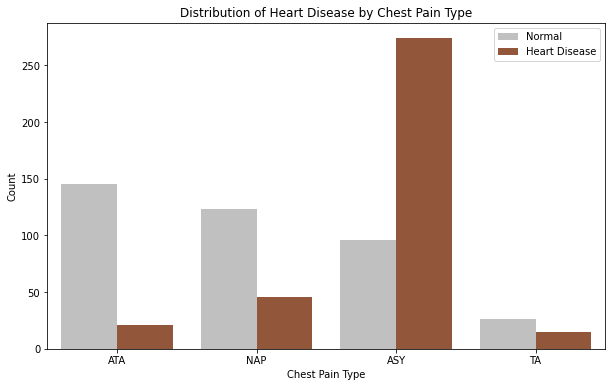

In [19]:
# Plotting count of Heart Disease by Chest Pain Type
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='ChestPainType', hue='HeartDisease', palette=['#C0C0C0', '#A0522D'], hue_order=[0, 1])
plt.title('Distribution of Heart Disease by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(['Normal', 'Heart Disease'])
plt.show()

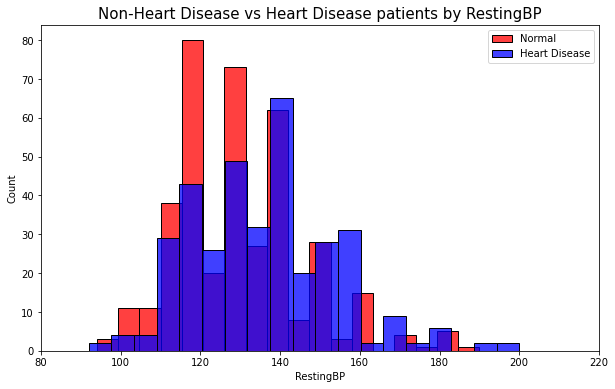

In [20]:
# Plotting histograms for RestingBP of patients with and without heart disease
plt.figure(figsize=(10, 6))
sns.histplot(data[data['HeartDisease'] == 0]["RestingBP"], color='red', label="No")
sns.histplot(data[data['HeartDisease'] == 1]["RestingBP"], color='blue', label="Yes")
plt.legend(['Normal', 'Heart Disease'])
plt.title('Non-Heart Disease vs Heart Disease patients by RestingBP', fontsize=15)
plt.xlabel('RestingBP')
plt.ylabel('Count')
plt.xlim([80, 220])  
plt.show()

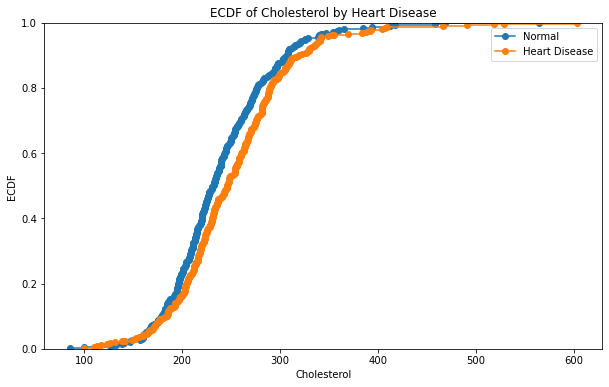

In [21]:
# Plotting ECDF of Cholesterol by Heart Disease
plt.figure(figsize=(10, 6))
for hd in data['HeartDisease'].unique():
    subset = data[data['HeartDisease'] == hd]['Cholesterol']
    sns.ecdfplot(subset, label=f'Heart Disease: {hd}', marker='o')
plt.title('ECDF of Cholesterol by Heart Disease')
plt.xlabel('Cholesterol')
plt.ylabel('ECDF')
plt.legend(['Normal', 'Heart Disease'])
plt.show()

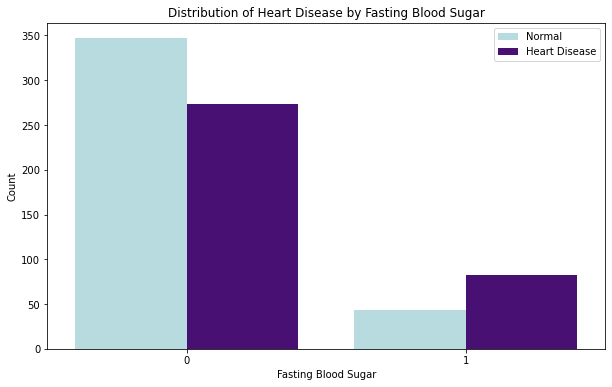

In [22]:
# Plotting the distribution of Heart Disease by Fasting Blood Sugar
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='FastingBS', hue='HeartDisease', palette=['#B0E0E6', '#4B0082'], hue_order=[0, 1])
plt.title('Distribution of Heart Disease by Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Count')
plt.legend(['Normal', 'Heart Disease'])
plt.show()

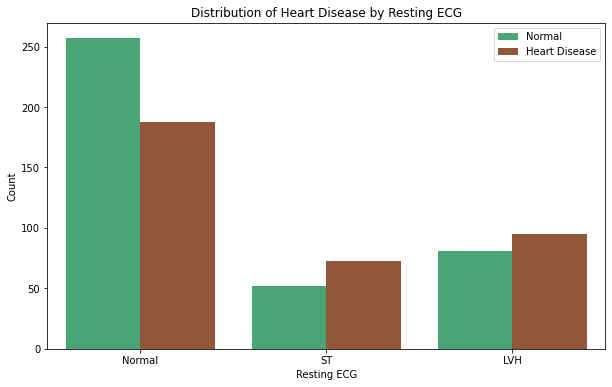

In [23]:
# Plotting the distribution of Heart Disease by Resting ECG
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='RestingECG', hue='HeartDisease', palette=['#3CB371', '#A0522D'], hue_order=[0, 1])
plt.title('Distribution of Heart Disease by Resting ECG')
plt.xlabel('Resting ECG')
plt.ylabel('Count')
plt.legend(['Normal', 'Heart Disease'])
plt.show()

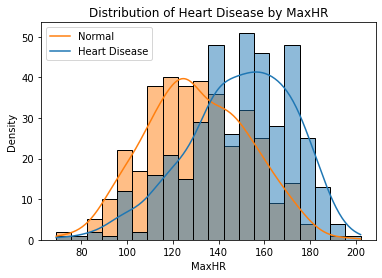

In [24]:
# Plotting the distribution of Heart Disease by MaxHR
plt.figure(figsize=(6, 4))
sns.histplot(data=data, x='MaxHR', hue='HeartDisease', kde=True, bins=20)
plt.title('Distribution of Heart Disease by MaxHR')
plt.xlabel('MaxHR')
plt.ylabel('Density')
plt.legend(['Normal', 'Heart Disease'])
plt.show()

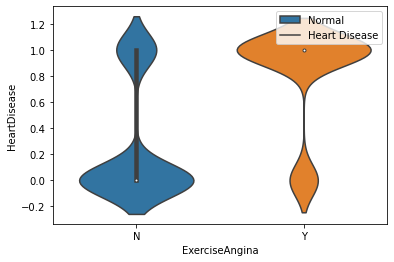

In [25]:
# Visualizing the distribution of HeartDisease by ExerciseAngina
sns.violinplot(y="HeartDisease", x="ExerciseAngina", data=data)
plt.legend(['Normal', 'Heart Disease'])
plt.show()


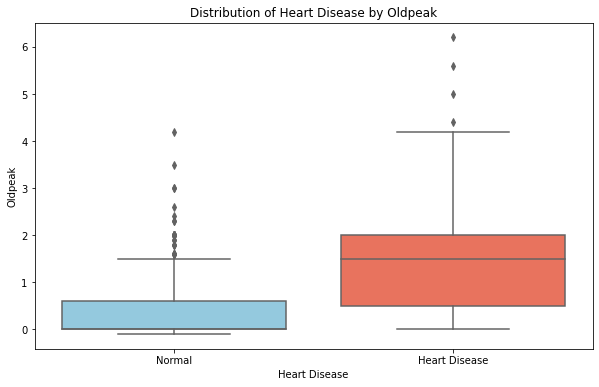

In [26]:
# Creating a grouped box plot for HeartDisease by Oldpeak
plt.figure(figsize=(10, 6))
sns.boxplot(x="HeartDisease", y="Oldpeak", data=data, palette=["#87CEEB", "#FF6347"])
plt.title('Distribution of Heart Disease by Oldpeak')
plt.xlabel('Heart Disease')
plt.ylabel('Oldpeak')
plt.xticks([0, 1], ['Normal', 'Heart Disease'])
plt.show()



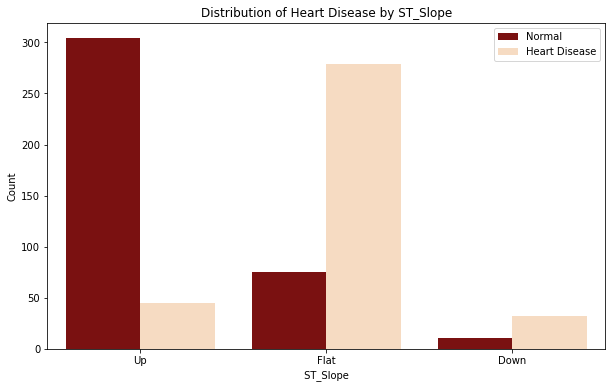

In [27]:
# Plotting a count plot for the distribution of heart disease by ST_Slope
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='ST_Slope', hue='HeartDisease', palette=['#8B0000', '#FFDAB9'], hue_order=[0, 1])
plt.title('Distribution of Heart Disease by ST_Slope')
plt.xlabel(' ST_Slope ')
plt.ylabel('Count')
plt.legend(['Normal', 'Heart Disease'])
plt.show()

In [28]:
# Selecting columns with object data type
cat_cols=data.select_dtypes(include=['object']).columns
cat_cols

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix, classification_report, accuracy_score, precision_score, roc_auc_score, auc, recall_score, f1_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from tabulate import tabulate
from sklearn.preprocessing import StandardScaler

In [30]:
# Encoding categorical variables using LabelEncoder
label_encoder = LabelEncoder()
for col in cat_cols:
    data[col] = label_encoder.fit_transform(data[col])

<AxesSubplot:>

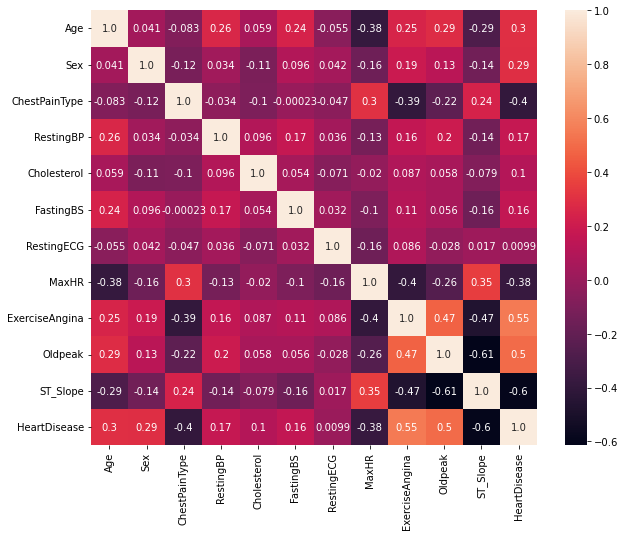

In [31]:
# Plotting a heatmap to visualize the correlation matrix of the data
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,fmt='.2')

In [32]:
# Defining the features (independent variables) as 'x' and labels (dependent variable) as 'y'
x = data.drop(['HeartDisease'], axis=1)
y = data['HeartDisease']

In [33]:
#Using SelectKBest to find the best features for our model
sel = SelectKBest(k=5)
sel.fit(x, y)
fe = sel.transform(x)

In [34]:
# Creating a DataFrame with feature names and selection scores
feature_scores = pd.DataFrame({'Columns': x.columns, 'Selection Score': sel.scores_})

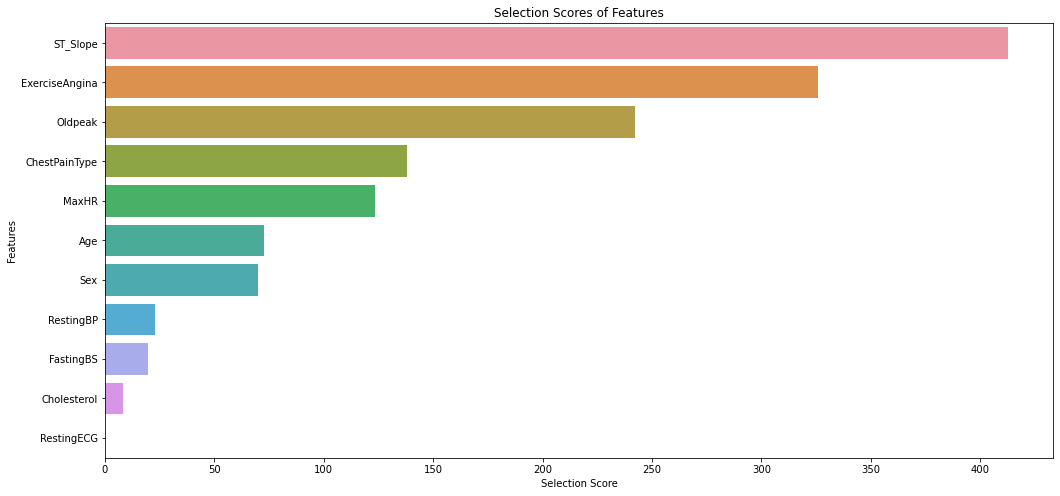

In [35]:
# Plotting the selection scores
plt.figure(figsize=(17, 8))
sns.barplot(x='Selection Score', y='Columns', data=feature_scores.sort_values('Selection Score', ascending=False))
plt.xlabel('Selection Score')
plt.ylabel('Features')
plt.title('Selection Scores of Features')
plt.show()

Since the selection score of 'RestingECG' is zero, we will drop this feature before train and test split

In [36]:
#Dropping RestingECG
X = x.drop(['RestingECG'],axis=1)
y = data['HeartDisease']

In [37]:
#Splitting the dataset into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [38]:
#Standardizing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
# Finding the best models through evaluation metrics
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBClassifier": XGBClassifier()
}

In [40]:
# Train and evaluate each classifier
evaluation = []
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)  
    y_pred = clf.predict(X_test)  
    # Calculate evaluation metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    # Append scores to evaluation list
    evaluation.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
    })

# Convert evaluation list to DataFrame
model_evaluation = pd.DataFrame(evaluation)

# Sort the DataFrame by descending ROC AUC score
model_evaluation = model_evaluation.sort_values(by='F1-Score', ascending=False)

# Display the model evaluation table using tabulate
table = tabulate(model_evaluation, headers='keys', tablefmt='fancy_grid', showindex=False)

# Print the table
print(table)

╒═════════════════════╤════════════╤═════════════╤══════════╤════════════╕
│ Model               │   Accuracy │   Precision │   Recall │   F1-Score │
╞═════════════════════╪════════════╪═════════════╪══════════╪════════════╡
│ Logistic Regression │   0.873333 │    0.837838 │ 0.898551 │   0.867133 │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Gradient Boosting   │   0.853333 │    0.821918 │ 0.869565 │   0.84507  │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Random Forest       │   0.846667 │    0.802632 │ 0.884058 │   0.841379 │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ XGBClassifier       │   0.826667 │    0.779221 │ 0.869565 │   0.821918 │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ K-Nearest Neighbors │   0.806667 │    0.777778 │ 0.811594 │   0.794326 │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Decision Tree       │  

From the results above, it can be seen that Logistic Regression, Gradient Boosting, Random Forest and XGBClassifier are the best fit models for this data, so these will be explored further.

### Logistic Regression

##### Hyperparameter tuning

In [41]:
# Define the parameter grid for Logistic Regression
param_grid_logistic = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

In [42]:
# Initialize Logistic Regression Classifier
logistic_classifier = LogisticRegression()

# Perform Grid Search to find the best hyperparameters
grid_search_logistic = GridSearchCV(logistic_classifier, param_grid_logistic, cv=5, scoring='roc_auc')
grid_search_logistic.fit(X_train, y_train)

# Get the best hyperparameters
best_params_logistic = grid_search_logistic.best_params_

# Retrain the model with the best hyperparameters
best_logistic_classifier = LogisticRegression(**best_params_logistic)
best_logistic_classifier.fit(X_train, y_train)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [43]:
# Predictions using the best Logistic Regression Classifier
y_pred_logistic_best = best_logistic_classifier.predict(X_test)

# Calculate accuracy of the best Logistic Regression model
accuracy_logistic_best = accuracy_score(y_test, y_pred_logistic_best)

# Print the accuracy of the best Logistic Regression model
print("Accuracy of the Logistic Regression Classifier with hyperparameters:", accuracy_logistic_best)


Accuracy of the Logistic Regression Classifier with hyperparameters: 0.8733333333333333


In [44]:
# Predictions using the best Logistic Regression Classifier
y_pred_logistic_best = best_logistic_classifier.predict(X_test)

# Generate classification report
report_logistic_best = classification_report(y_test, y_pred_logistic_best)

# Print the classification report
print("Classification Report for Logistic Regression:\n", report_logistic_best)

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.91      0.85      0.88        81
           1       0.84      0.90      0.87        69

    accuracy                           0.87       150
   macro avg       0.87      0.88      0.87       150
weighted avg       0.88      0.87      0.87       150



C:\Users\94772\anaconda3\New folder\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 576x432 with 0 Axes>

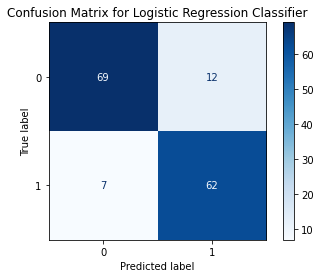

In [45]:
# Plot confusion matrix 
plt.figure(figsize=(8, 6))
disp_logistic = plot_confusion_matrix(best_logistic_classifier, X_test, y_test, cmap='Blues', values_format='.3g')
disp_logistic.ax_.set_title('Confusion Matrix for Logistic Regression Classifier')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

C:\Users\94772\anaconda3\New folder\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


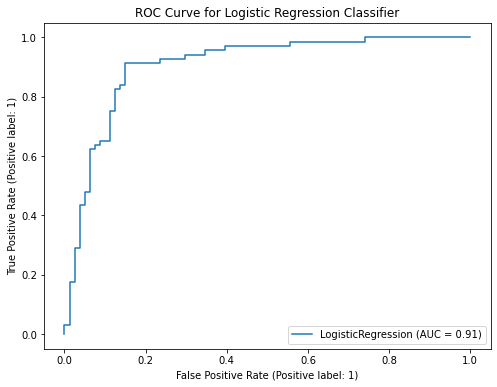

In [46]:
# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plot_roc_curve(best_logistic_classifier, X_test, y_test, ax=plt.gca())
plt.title('ROC Curve for Logistic Regression Classifier')
plt.show()

### Gradient Boosting

In [47]:
# Initialize and fit the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier()

C:\Users\94772\anaconda3\New folder\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 576x432 with 0 Axes>

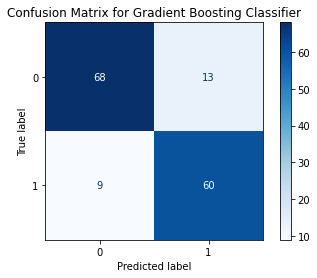

In [48]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp_gb = plot_confusion_matrix(gb_classifier, X_test, y_test, cmap='Blues', values_format='.3g')
disp_gb.ax_.set_title('Confusion Matrix for Gradient Boosting Classifier')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

C:\Users\94772\anaconda3\New folder\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


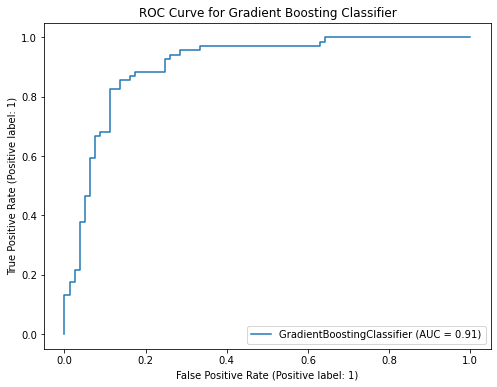

In [49]:
# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plot_roc_curve(gb_classifier, X_test, y_test, ax=plt.gca())
plt.title('ROC Curve for Gradient Boosting Classifier')
plt.show()

### Random Forest

In [50]:
# Initialize and fit the Random Forest classifier 
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

C:\Users\94772\anaconda3\New folder\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 576x432 with 0 Axes>

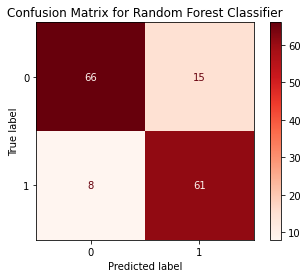

In [51]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp_rf = plot_confusion_matrix(rf_classifier, X_test, y_test, cmap='Reds', values_format='.3g')
disp_rf.ax_.set_title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

C:\Users\94772\anaconda3\New folder\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


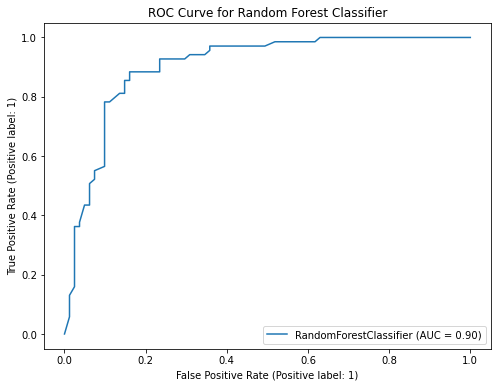

In [52]:
# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plot_roc_curve(rf_classifier, X_test, y_test, ax=plt.gca())
plt.title('ROC Curve for Random Forest Classifier')
plt.show()

### XGBoost classifier

In [53]:
# Train XGBoost classifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

C:\Users\94772\anaconda3\New folder\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 576x432 with 0 Axes>

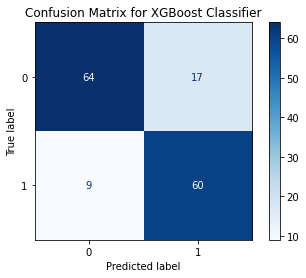

In [54]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
disp_xgb = plot_confusion_matrix(xgb_classifier, X_test, y_test, cmap='Blues', values_format='.3g')
disp_xgb.ax_.set_title('Confusion Matrix for XGBoost Classifier')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

C:\Users\94772\anaconda3\New folder\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


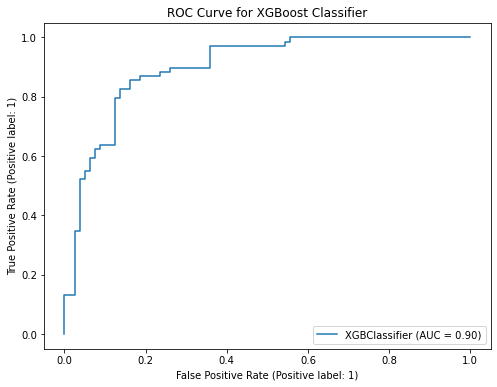

In [55]:
# Evaluate ROC curve
plt.figure(figsize=(8, 6))
plot_roc_curve(xgb_classifier, X_test, y_test, ax=plt.gca())
plt.title('ROC Curve for XGBoost Classifier')
plt.show()

###### Plotting the ROC Curves for the BEST 4 models for comparison

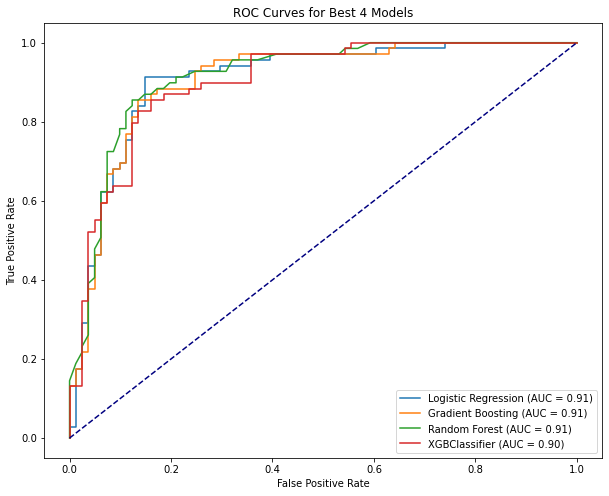

In [56]:
# Select the best 4 models from the model_evaluation DataFrame
best_models = model_evaluation.head(4)['Model']

# Plot ROC curves for the best 4 models
plt.figure(figsize=(10, 8))
for name in best_models:
    clf = classifiers[name]
    fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
    auc_score = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Best 4 Models')
plt.legend(loc='lower right')
plt.show()